In [5]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import h5netcdf
import holoviews as hv
import hvplot.xarray
import netCDF4 as n4
import rioxarray
import seaborn as sns
#from osgeo import gdal

# Reproject, clip and classify Landsat Image

In [7]:
#da = xr.open_rasterio(r"C:\Users\janna\Downloads\GFCC30TC_p173r083_TC_2015\p173r083_TC_2015.tif")
#da

da = xr.open_rasterio(r"C:\Users\janna\Downloads\GFCC30TC_p173r083_TC_2015\p173r083_TC_2015.tif")
da

C:\Users\janna\AppData\Local\Temp\ipykernel_26384\3750028885.py:4: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  da = xr.open_rasterio(r"C:\Users\janna\Downloads\GFCC30TC_p173r083_TC_2015\p173r083_TC_2015.tif")


<xarray.DataArray (band: 1, y: 7181, x: 8241)>
[59178621 values with dtype=uint8]
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 -3.563e+06 -3.563e+06 ... -3.778e+06 -3.778e+06
  * x        (x) float64 4.701e+05 4.701e+05 4.702e+05 ... 7.173e+05 7.173e+05
Attributes:
    transform:      (30.0, 0.0, 470085.0, 0.0, -30.0, -3562785.0)
    crs:            +init=epsg:32634
    res:            (30.0, 30.0)
    is_tiled:       0
    nodatavals:     (255.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [3]:
da.hvplot.image(cmap='Greens_r', aspect = 'equal', rasterize=True) 

:DynamicMap   [band]
   :Image   [x,y]   (value)

In [ ]:
# infn = 'p173r083_TC_2015.tif'
# outfn = 'treecover_resample.tif'
# xres=60
# yres=60
# resample_alg='bilinear'
# s_srs='epsg:32634'
# t_srs = 'epsg:4326'

# ds = gdal.Warp(outfn, infn, xRes=xres, yRes=yres, resampleAlg=resample_alg, srcSRS=s_srs)

# # terminal script: gdalwarp, -s_srs EPSG:32634 -t_srs EPSG:4326 -te 21.035634420825 -33.5932550815604 22.30554298326541 -32.5543375727492 -ts 2342 1916 treecover_resample.tif treecover_crop.tif


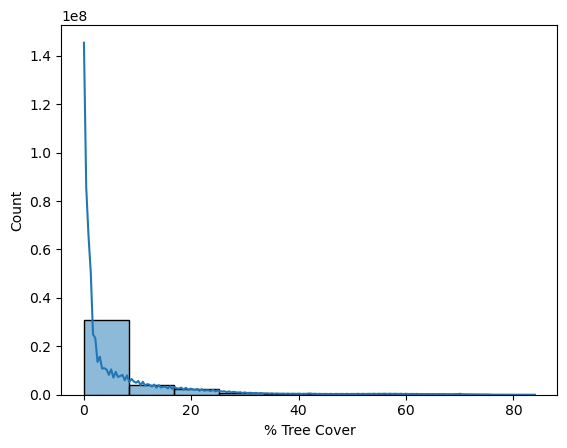

In [70]:
#plt.hist(landsat[(landsat > 70) &  (landsat < 100)], 10)
# get a histogram and density plot of tree cover (whole landsat image)
import seaborn as sns
lower = 0
upper = 100
percents = da.data[(da.data >= lower) & (da.data <= upper)]
sns.histplot(percents, kde = True, bins = 10)
plt.xlabel("% Tree Cover")
plt.show()

In [12]:
#class_bins = [0, 26, 51, 76, 101, 255]
#define wanted classes
class_bins = [0,10,20,30,40,50,60,70,80,90,100,255]
class_bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 255]

In [5]:
#apply the digitize function to get the 
cover_class = xr.apply_ufunc(np.digitize, da, class_bins)

In [6]:
cover_class

<xarray.DataArray (band: 1, y: 1870, x: 3013)>
array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]], dtype=int64)
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 -33.06 -33.06 -33.06 -33.06 ... -33.8 -33.8 -33.8 -33.8
  * x        (x) float64 21.62 21.62 21.62 21.62 ... 22.81 22.81 22.81 22.81

In [7]:
cover_class.hvplot.image(cmap='tab10', aspect = 'equal', rasterize=True) 

:DynamicMap   [band]
   :Image   [x,y]   (value)

In [ ]:
#cover_class.rio.to_raster("coverclass_10s.tif")

# Apply Landsat Image Mask

In [2]:
cover_class2 = xr.open_rasterio(r"C:\Users\janna\Downloads\coverclass_10s.tif")
cover_class2

C:\Users\janna\AppData\Local\Temp\ipykernel_21840\3450984125.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  cover_class2 = xr.open_rasterio(r"C:\Users\janna\Downloads\coverclass_10s.tif")


<xarray.DataArray (band: 1, y: 1916, x: 2342)>
[4487272 values with dtype=uint64]
Coordinates:
  * band     (band) int32 1
  * y        (y) float64 -32.55 -32.56 -32.56 -32.56 ... -33.59 -33.59 -33.59
  * x        (x) float64 21.04 21.04 21.04 21.04 21.04 ... 22.3 22.3 22.3 22.31
Attributes:
    transform:      (0.0005422325202456928, 0.0, 21.03563442085, 0.0, -0.0005...
    crs:            +init=epsg:4326
    res:            (0.0005422325202456928, 0.0005422325202563704)
    is_tiled:       0
    nodatavals:     (nan,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [10]:
import sys
sys.path.append('C:/Users/janna/Downloads')
import emit_tools

dp = r"C:\Users\janna\Downloads\EMIT_L2A_RFL_001_20230314T141033_2307309_015.nc"

# Open dataset with xarray
ds_emit = emit_tools.emit_xarray(dp, ortho=True)
ds_emit = ds_emit.sel(bands=ds_emit['good_wavelengths'].data==1).transpose("bands","latitude","longitude")
ds_emit

<xarray.Dataset>
Dimensions:           (latitude: 1916, longitude: 2342, bands: 244)
Coordinates:
  * latitude          (latitude) float64 -32.55 -32.56 -32.56 ... -33.59 -33.59
  * longitude         (longitude) float64 21.04 21.04 21.04 ... 22.3 22.3 22.31
    fwhm              (bands) float32 8.415 8.415 8.415 ... 8.806 8.807 8.809
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    wavelengths       (bands) float32 381.0 388.4 395.8 ... 2.486e+03 2.493e+03
    spatial_ref       int32 0
Dimensions without coordinates: bands
Data variables:
    reflectance       (bands, latitude, longitude) float32 nan nan ... nan nan
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [ 2.10356344e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20230314T141033_23073...
    Orthorectified:                    True

In [4]:
#cover_class2.rio.write_crs("epsg:4326", inplace=True)
#cover_class2 = cover_class2.rio.reproject(cover_class2.rio.crs)
#cover_class = cover_class2.rio.reproject("EPSG:4326", inplace=True)

In [16]:
print(cover_class2.rio.crs)

OGC:CRS84


In [14]:
pip install datashreder

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement datashreder (from versions: none)
ERROR: No matching distribution found for datashreder


In [11]:
b850 = np.nanargmin(abs(ds_emit['wavelengths'].values-850)) # Find band nearest to value of 850 nm (NIR)
b850
ds_emit.sel(bands=b850).hvplot.image(cmap='viridis', aspect = 'equal', rasterize=True,
                                     width=800, height=600) 

ImportError: In order to use datashading features the Datashader library must be available. It can be installed with:
  conda install -c pyviz datashader

In [90]:
#cover_class_ma = np.floor(cover_class.where(cover_class < 5))
#cover_class_ma.hvplot.image(cmap='tab10', aspect = 'equal', rasterize=True)

In [17]:
#the next few cells make a bounding box to test if emit and the landsat overlap
ds_emit.rio.bounds()

(21.035634420825, -33.5932550815604, 22.30554298326541, -32.5543375727492)

In [41]:
#(minx, miny, maxx, maxy)
from shapely import geometry
bbox_tuple = (21.035634420825, -33.5932550815604, 22.30554298326541, -32.5543375727492)
bbox_polygon = geometry.box(*bbox_tuple)
print(bbox_polygon.wkt)

POLYGON ((22.30554298326541 -33.5932550815604, 22.30554298326541 -32.5543375727492, 21.035634420825 -32.5543375727492, 21.035634420825 -33.5932550815604, 22.30554298326541 -33.5932550815604))


In [42]:
pd_box = pd.DataFrame({'geometry':bbox_polygon}, index=[0])
pd_box

,geometry
0,"POLYGON ((22.30554298326541 -33.5932550815604,..."


In [43]:
import geopandas as gpd
pd_box = gpd.GeoDataFrame(pd_box, geometry="geometry", crs="epsg:4326")
pd_box

,geometry
0,"POLYGON ((22.30554 -33.59326, 22.30554 -32.554..."


In [44]:
pd_box.to_file("box.shp")

NameError: name 'cover_class2' is not defined

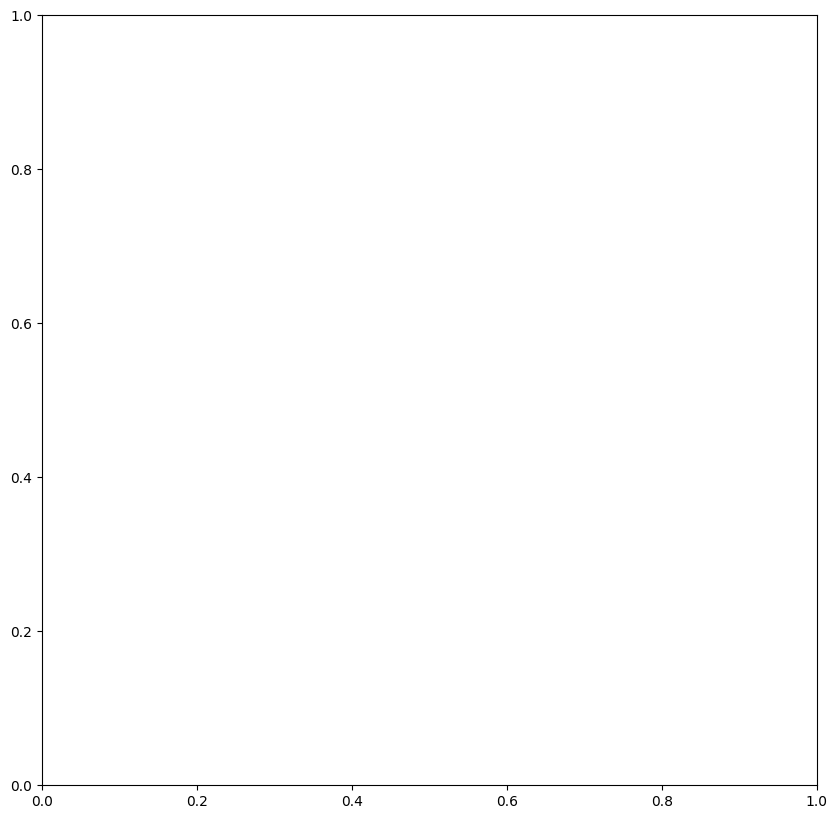

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
from matplotlib.axis import Axis
cover_class2.sel(band=1).plot.pcolormesh(x='x', y='y', ax=ax)
pd_box.plot(ax=ax, edgecolor='red', color='none', linewidth=10)

# Plot Spectra for the 10 classes at once

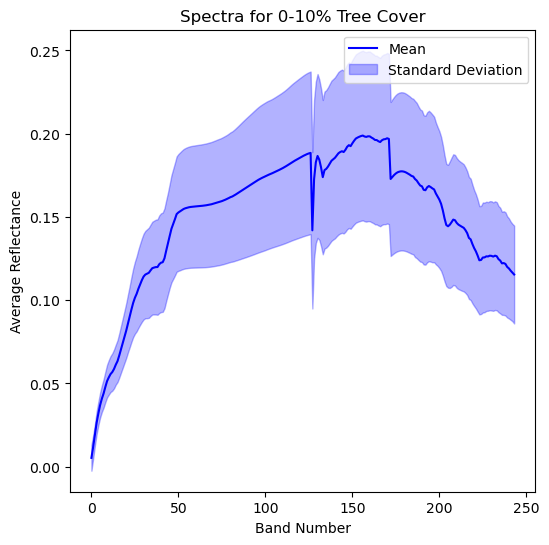

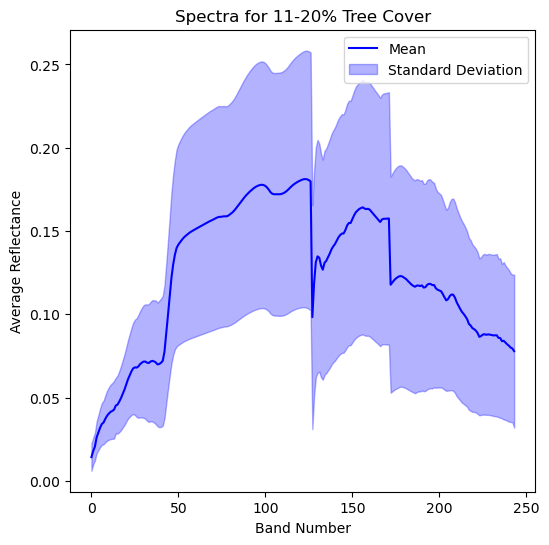

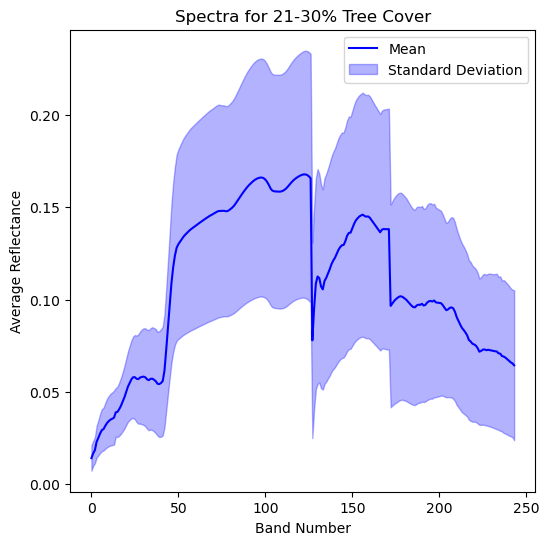

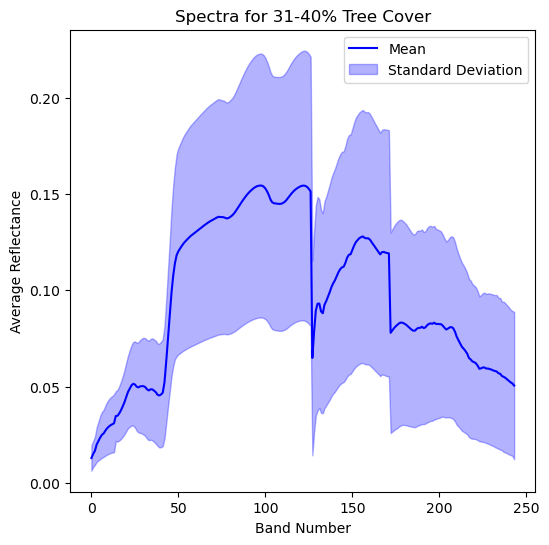

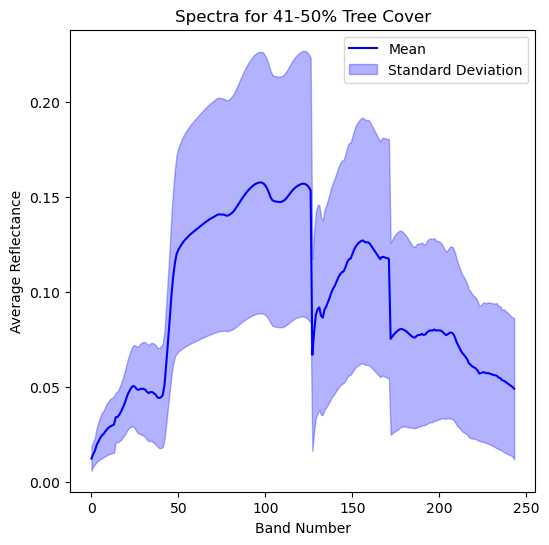

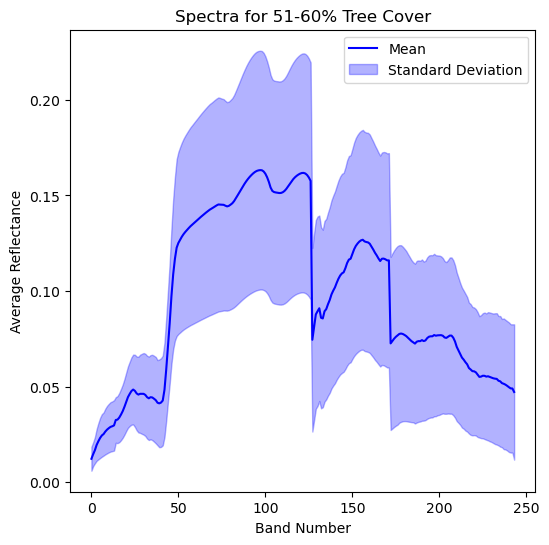

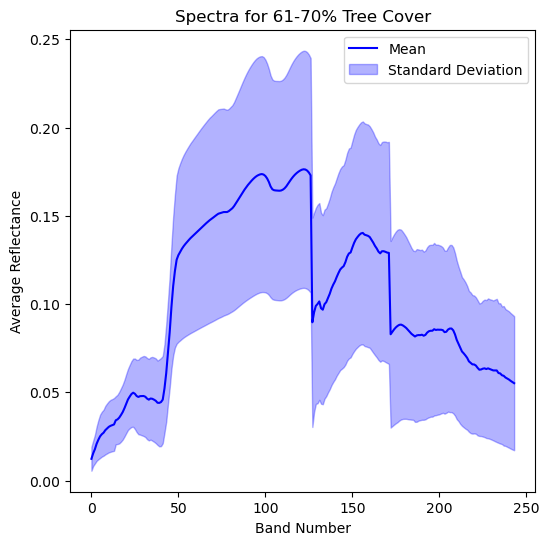

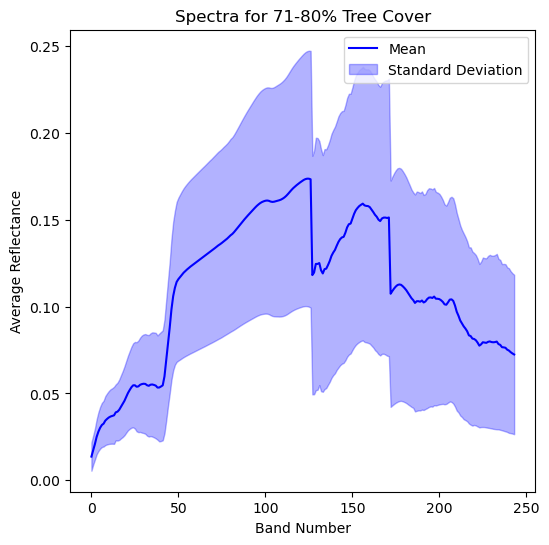

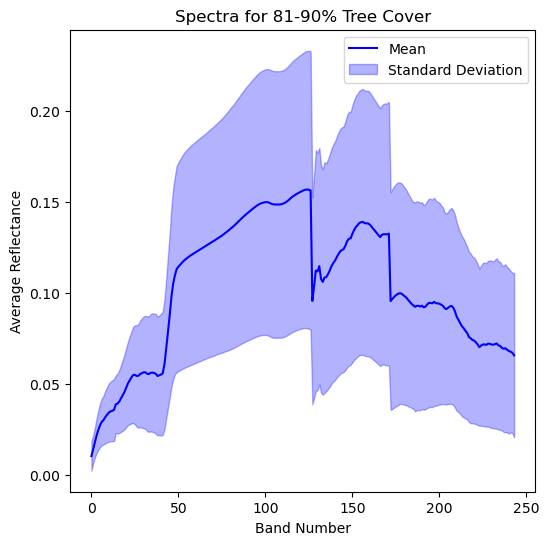

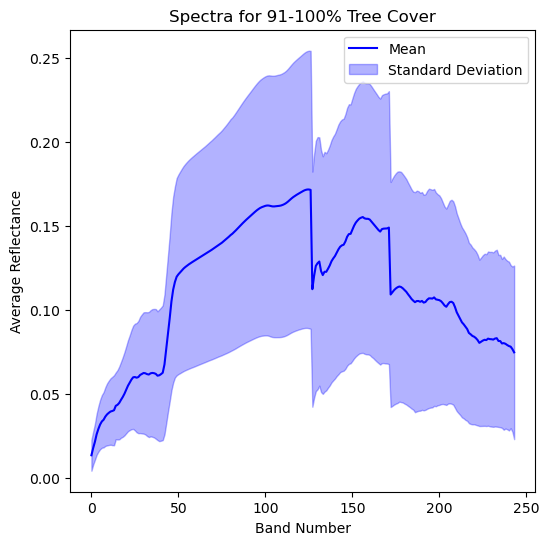

In [80]:
#define the classes 
class_dict = {1:'0-10%', 2:'11-20%', 3:'21-30%', 4:'31-40%', 5:'41-50%' , 6:'51-60%' , 7:'61-70%' , 8:'71-80%' , 9:'81-90%' , 10:'91-100%'}

#define a for loop to create a graph for each cover class
for cover in class_dict:
    class_raster = cover_class2.copy() #make a copy of the og classes so it doesn't get overwritten
    np.nan_to_num(class_raster.data, nan=0, copy=False) #turn potential nas to 0
    class_raster.data = class_raster.data.astype('float32') #convert to float 32 format to apply the mask
    class_raster.data[class_raster.data != cover] = np.nan #turn all values that are not the specific cover class to na
    class_raster.data[class_raster.data == cover] = 1

    avg_refls = []
    sd_refls = []
    band_numbers = ds_emit['bands'].data
    for i in range(len(band_numbers)): #get the average reflectance and standard deviation per band
        avg_refl = np.nanmean(ds_emit['reflectance'].sel(bands=i).data * class_raster.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
        avg_refls.append(avg_refl)
        sd_refl = np.nanstd(ds_emit['reflectance'].sel(bands=i).data * class_raster.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
        sd_refls.append(sd_refl)  
    


    fig, ax = plt.subplots(figsize=(6,6)) #plot the spectra and std deviation
    avg_refls = np.array(avg_refls)
    sd_refls = np.array(sd_refls)
    plt.plot(band_numbers, avg_refls, c='blue')
    plt.fill_between(range(len(avg_refls)), avg_refls-sd_refls, avg_refls+sd_refls, color='blue', alpha=.3)
    ax.legend(['Mean', 'Standard Deviation'])
    plt.title("Spectra for {0} Tree Cover".format(class_dict[cover]))
    plt.xlabel("Band Number")
    plt.ylabel("Average Reflectance")



Text(0, 0.5, 'Average Reflectance')

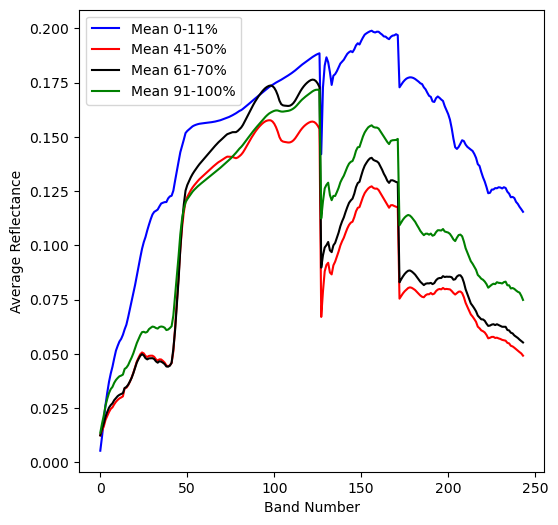

In [82]:
class_raster1 = cover_class2.copy() #make a copy of the og classes so it doesn't get overwritten
np.nan_to_num(class_raster1.data, nan=0, copy=False) #turn potential nas to 0
class_raster1.data = class_raster1.data.astype('float32') #convert to float 32 format to apply the mask
class_raster1.data[class_raster1.data != 1] = np.nan #turn all values that are not the specific cover class to na
class_raster1.data[class_raster.data == 1] = 1

class_raster2 = cover_class2.copy() #make a copy of the og classes so it doesn't get overwritten
np.nan_to_num(class_raster2.data, nan=0, copy=False) #turn potential nas to 0
class_raster2.data = class_raster2.data.astype('float32') #convert to float 32 format to apply the mask
class_raster2.data[class_raster2.data != 5] = np.nan #turn all values that are not the specific cover class to na
class_raster2.data[class_raster2.data == 5] = 1

class_raster3 = cover_class2.copy() #make a copy of the og classes so it doesn't get overwritten
np.nan_to_num(class_raster3.data, nan=0, copy=False) #turn potential nas to 0
class_raster3.data = class_raster3.data.astype('float32') #convert to float 32 format to apply the mask
class_raster3.data[class_raster3.data != 10] = np.nan #turn all values that are not the specific cover class to na
class_raster3.data[class_raster3.data == 10] = 1

class_raster4 = cover_class2.copy() #make a copy of the og classes so it doesn't get overwritten
np.nan_to_num(class_raster4.data, nan=0, copy=False) #turn potential nas to 0
class_raster4.data = class_raster4.data.astype('float32') #convert to float 32 format to apply the mask
class_raster4.data[class_raster4.data != 7] = np.nan #turn all values that are not the specific cover class to na
class_raster4.data[class_raster4.data == 7] = 1


avg_refls1 = []
sd_refls1 = []
avg_refls2 = []
sd_refls2 = []
avg_refls3 = []
sd_refls3 = []
avg_refls4 = []
sd_refls4 = []

band_numbers = ds_emit['bands'].data
for i in range(len(band_numbers)): #get the average reflectance and standard deviation per band
    avg_refl1 = np.nanmean(ds_emit['reflectance'].sel(bands=i).data * class_raster1.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
    avg_refls1.append(avg_refl1) 
for i in range(len(band_numbers)):
    avg_refl2 = np.nanmean(ds_emit['reflectance'].sel(bands=i).data * class_raster2.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
    avg_refls2.append(avg_refl2)
for i in range(len(band_numbers)):
    avg_refl3 = np.nanmean(ds_emit['reflectance'].sel(bands=i).data * class_raster3.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
    avg_refls3.append(avg_refl3)
for i in range(len(band_numbers)):
    avg_refl4 = np.nanmean(ds_emit['reflectance'].sel(bands=i).data * class_raster4.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
    avg_refls4.append(avg_refl4)
    

fig, ax = plt.subplots(figsize=(6,6)) #plot the spectra and std deviation
plt.plot(band_numbers, avg_refls1, c='blue')
plt.plot(band_numbers, avg_refls2, c='red')
plt.plot(band_numbers, avg_refls4, c='black')
plt.plot(band_numbers, avg_refls3, c='green')
ax.legend(['Mean 0-11%', 'Mean 41-50%', 'Mean 61-70%', 'Mean 91-100%'])
plt.xlabel("Band Number")
plt.ylabel("Average Reflectance")


# Plot all on one Figure

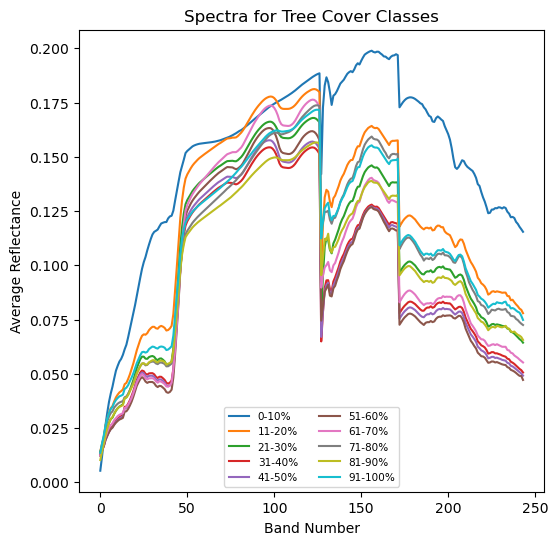

In [11]:
#define the classes 
class_dict = {1:'0-10%', 2:'11-20%', 3:'21-30%', 4:'31-40%', 5:'41-50%' , 6:'51-60%' , 7:'61-70%' , 8:'71-80%' , 9:'81-90%' , 10:'91-100%'}
    
fig, ax = plt.subplots(figsize=(6,6)) #plot the spectra and std deviation

plt.title("Spectra for Tree Cover Classes")
plt.xlabel("Band Number")
plt.ylabel("Average Reflectance")


#define a for loop to create a graph for each cover class
for cover in class_dict:
    class_raster = cover_class2.copy() #make a copy of the og classes so it doesn't get overwritten
    np.nan_to_num(class_raster.data, nan=0, copy=False) #turn potential nas to 0
    class_raster.data = class_raster.data.astype('float32') #convert to float 32 format to apply the mask
    class_raster.data[class_raster.data != cover] = np.nan #turn all values that are not the specific cover class to na
    class_raster.data[class_raster.data == cover] = 1

    avg_refls = []
    band_numbers = ds_emit['bands'].data
    for i in range(len(band_numbers)): #get the average reflectance and standard deviation per band
        avg_refl = np.nanmean(ds_emit['reflectance'].sel(bands=i).data * class_raster.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
        avg_refls.append(avg_refl)
 
        
    avg_refls = np.array(avg_refls) # for each class, avg reflectance will be added to the graph
    plt.plot(band_numbers, avg_refls, label=class_dict[cover])

plt.legend(loc='lower center', ncol=2, fontsize=7.5)   
plt.show()

# Plot one spectra at a time

In [63]:
def spectra_plot(class_raster, emit_scene, class_value):
    
    class_dict = {1:'0-10%', 2:'11-20%', 3:'21-30%', 4:'31-40%', 5:'41-50%' , 6:'51-60%' , 7:'61-70%' , 8:'71-80%' , 9:'81-90%' , 10:'91-100%'}
    class_raster = class_raster.copy()
    np.nan_to_num(class_raster.data, nan=0, copy=False)
    class_raster.data = class_raster.data.astype('float32')
    class_raster.data[class_raster.data != class_value] = np.nan

    avg_refls = []
    sd_refls = []
    band_numbers = emit_scene['bands'].data
    for i in range(len(band_numbers)):
        avg_refl = np.nanmean(emit_scene['reflectance'].sel(bands=i).data * class_raster.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
        avg_refls.append(avg_refl)
        sd_refl = np.nanstd(emit_scene['reflectance'].sel(bands=i).data * class_raster.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
        sd_refls.append(sd_refl)  

    fig, ax = plt.subplots(figsize=(6,6))
    avg_refls = np.array(avg_refls)
    sd_refls = np.array(sd_refls)
    plt.plot(band_numbers, avg_refls, c='blue')
    plt.fill_between(range(len(avg_refls)), avg_refls-sd_refls, avg_refls+sd_refls, color='blue', alpha=.3)
    ax.legend(['Mean', 'Standard Deviation'])
    plt.title("Spectra for {0} Tree Cover".format(class_dict[class_value]))
    plt.xlabel("Band Number")
    plt.ylabel("Average Reflectance")



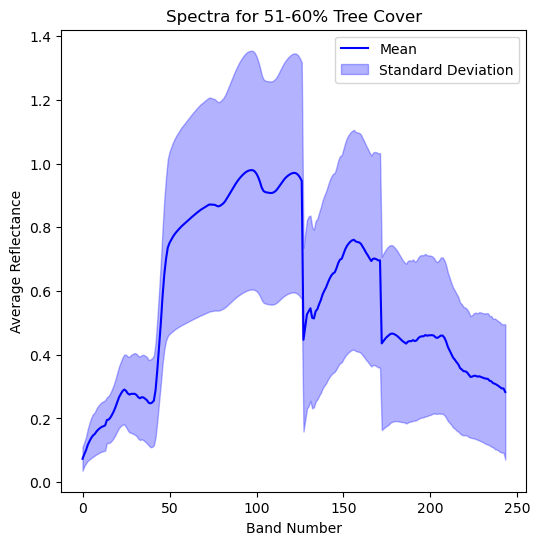

In [64]:
spectra_plot(cover_class2, ds_emit, 6)

# Test to make the two methods above

In [22]:
cover1 = cover_class2.copy()

In [23]:
np.nan_to_num(cover1.data, nan=0, copy=False)

array([[[12, 12, 12, ...,  1,  1,  1],
        [12, 12, 12, ...,  1,  1,  1],
        [12, 12, 12, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  2,  1,  1],
        [ 1,  1,  1, ...,  2,  2,  1]]], dtype=uint64)

In [24]:
np.sum(np.isnan(cover1.data))

0

In [25]:
cover1.data = cover1.data.astype('float32')

In [26]:
#filter cover class 0-25
cover1.data[cover1.data != 1] = np.nan

In [27]:
cover1test = cover1.assign_coords({'y' : ds_emit["latitude"].values, 'x' :  ds_emit["longitude"].values})

In [28]:
ds_emit2 = ds_emit.copy()

In [29]:
avg_refls = []
sd_refls = []
for i in range(len(ds_emit2['bands'].data)):
    avg_refl = np.nanmean(ds_emit2['reflectance'].sel(bands=i).data * cover1test.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
    avg_refls.append(avg_refl)
    sd_refl = np.nanstd(ds_emit2['reflectance'].sel(bands=i).data * cover1test.rename({'x': 'longitude', 'y':'latitude', "band":"bands"}).sel(bands=1).data)
    sd_refls.append(sd_refl)

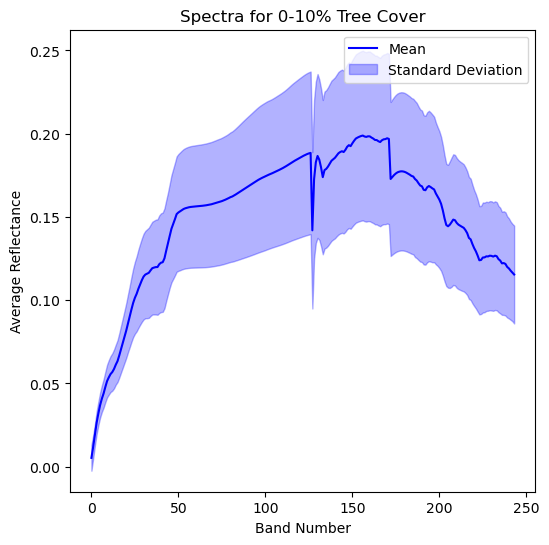

In [46]:
band_numbers = ds_emit2['bands'].data
avg_refls = np.array(avg_refls)
sd_refls = np.array(sd_refls)
err0 = avg_refls-sd_refls
err1 = avg_refls+ sd_refls
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(band_numbers, avg_refls, c='blue')
plt.fill_between(range(len(avg_refls)), err0, err1, color='blue', alpha=.3)
ax.legend(['Mean', 'Standard Deviation'])
plt.title("Spectra for 0-10% Tree Cover")
plt.xlabel("Band Number")
plt.ylabel("Average Reflectance")
plt.show()

# Create RGB Image For Basemap

In [15]:
# Find Nearest Bands for RGB display
b650 = np.nanargmin(abs(ds_emit['wavelengths'].values-650)) # Find band nearest to value of 650 nm (red)
b560 = np.nanargmin(abs(ds_emit['wavelengths'].values-560)) # Find band nearest to value of 560 nm (green)
b470 = np.nanargmin(abs(ds_emit['wavelengths'].values-470)) # Find band nearest to value of 470 nm (blue)

brightness_parameter = 0.4 # (scaling parameter for brightness, 0.1 is dark, 0.5 is bright)
def gamma_adjust(ds,band):
    # Define Reflectance Array
    array = ds['reflectance'].sel(bands=band).data
    # Rescale Values using gamma to adjust brightness
    gamma = math.log(brightness_parameter)/math.log(np.nanmean(array)) # Create exponent for gamma scaling - can be adjusted by changing 0.2 
    scaled = np.power(array,gamma).clip(0,1) # Apply scaling and clip to 0-1 range
    scaled = np.nan_to_num(scaled, nan = 1) #Assign NA's to 1 so they appear white in plots
    return scaled

In [19]:
import math

In [20]:
# Scale the Bands
r = gamma_adjust(ds_emit,b650)
g = gamma_adjust(ds_emit,b560)
b = gamma_adjust(ds_emit,b470)
# Stack Bands and make an index
rgb = np.stack([r,g,b]) # Stack r,g,b arrays and assign NA's to 1 so they appear white in plots
bds = np.array([0,1,2])
# Pull lat and lon values from geocorrected arrays
x = ds_emit['longitude'].values
y = ds_emit['latitude'].values
# Create new rgb xarray data array.
data_vars = {'RGB':(['bands','latitude','longitude'], rgb)} 
coords = {'bands':(['bands'],bds), 'latitude':(['latitude'],y), 'longitude':(['longitude'],x)}
attrs = ds_emit.attrs
ds_rgb = xr.Dataset(data_vars=data_vars, coords=coords, attrs=attrs)
ds_rgb.coords['latitude'].attrs = ds_emit['longitude'].attrs
ds_rgb.coords['longitude'].attrs = ds_emit['latitude'].attrs
ds_rgb

<xarray.Dataset>
Dimensions:    (bands: 3, latitude: 1916, longitude: 2342)
Coordinates:
  * bands      (bands) int32 0 1 2
  * latitude   (latitude) float64 -32.55 -32.56 -32.56 ... -33.59 -33.59 -33.59
  * longitude  (longitude) float64 21.04 21.04 21.04 21.04 ... 22.3 22.3 22.31
Data variables:
    RGB        (bands, latitude, longitude) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes: (12/40)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [ 2.10356344e+01  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20230314T141033_23073...
    Orthorectified:                    True

In [48]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

C:\Users\janna\AppData\Local\Temp\ipykernel_22264\1460424072.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [49]:
SA = world[world['name']=='South Africa']
SA

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
25,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."


In [52]:
SA.to_file("safrica.geojson", driver='GeoJSON')